**Importar-Librerias**

In [ ]:
from scipy.stats import kstest, norm
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene
from itertools import combinations
from scipy.stats import mannwhitneyu
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Cargar datos**

In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/curso-est/corte-2/datos/datos_maquinas.xlsx")
datos.head()

,Grupo,Valor
0,M1,2.047204
1,M1,7.985505
2,M1,5.706958
3,M1,5.550653
4,M1,6.347552


**Comprobar supuestos**

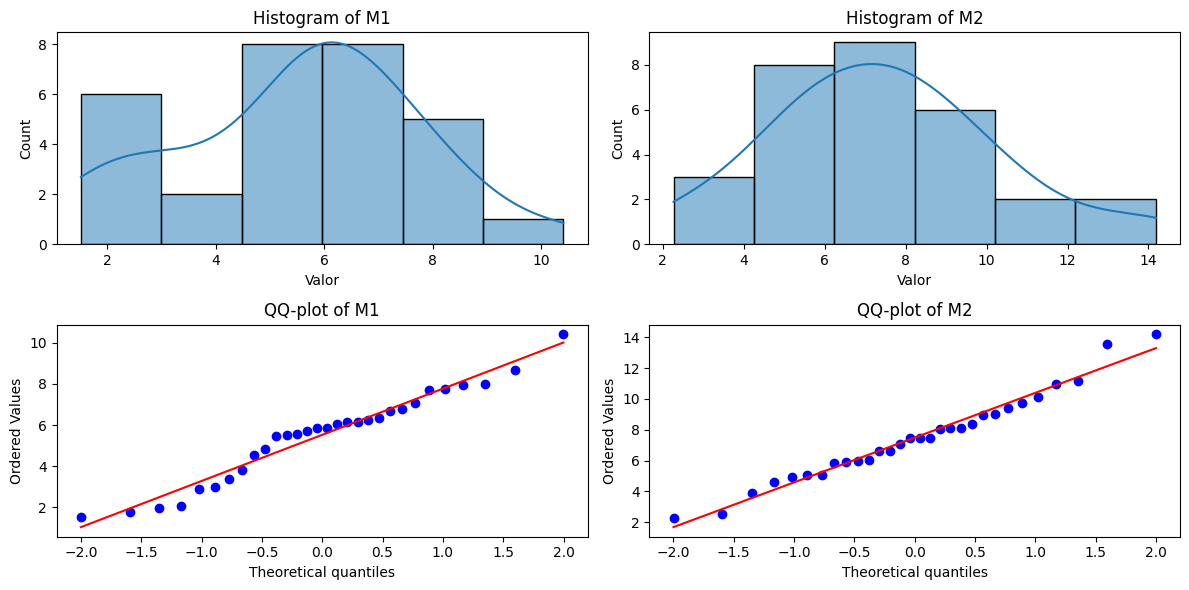

In [ ]:
unique_groups = datos['Grupo'].unique()
plt.figure(figsize=(12, 6))
for i, group in enumerate(unique_groups):
    plt.subplot(2, len(unique_groups), i+1)
    sns.histplot(datos[datos['Grupo'] == group]['Valor'], kde=True)
    plt.title(f'Histogram of {group}')
    plt.subplot(2, len(unique_groups), len(unique_groups) + i+1)
    stats.probplot(datos[datos['Grupo'] == group]['Valor'], plot=plt)
    plt.title(f'QQ-plot of {group}')
plt.tight_layout()
plt.show()

**PRUEBA SHAPIRO**

In [ ]:
shapiro_results = {}
for group in unique_groups:
    _, p_value = stats.shapiro(datos[datos['Grupo'] == group]['Valor'])
    shapiro_results[group] = round(p_value, 4)

shapiro_results

{'M1': 0.3323, 'M2': 0.7276}

**PRUEBA KOLMOGOROV**

In [ ]:
ks_results = {}
for group in unique_groups:
    values = datos[datos['Grupo'] == group]['Valor']
    _, p_value = kstest(values, 'norm', args=(values.mean(), values.std()))
    ks_results[group] = round(p_value, 4)

ks_results

{'M1': 0.3986, 'M2': 0.9858}

**PRUEBA - HOMOCEDASTICIDAD - LEVENE**

In [ ]:
unique_groups = datos['Grupo'].unique()
levene_results = {}
group_pairs = list(combinations(unique_groups, 2))
for group1, group2 in group_pairs:
    values1 = datos[datos['Grupo'] == group1]['Valor']
    values2 = datos[datos['Grupo'] == group2]['Valor']
    _, p_value = levene(values1, values2)
    levene_results[f"{group1} & {group2}"] = round(p_value, 4)

levene_results

{'M1 & M2': 0.2393}

**Prueba U de Mann-Whitney**

In [ ]:
G1 = datos[datos['Grupo'] == 'M1']['Valor']
G22 = datos[datos['Grupo'] == 'M2']['Valor']
_, p = mannwhitneyu(G1, G2)
p_valor_rounded = round(p, 6)

print("p-valor:", p_valor_rounded)

p-valor: 0.007617


**Boxplot**

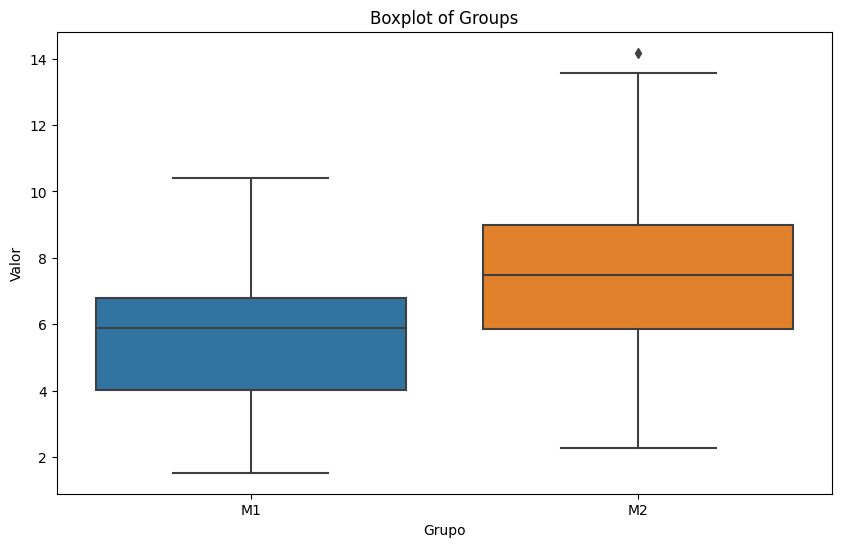

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Valor', data=datos)
plt.title('Boxplot of Groups')
plt.xlabel('Grupo')
plt.ylabel('Valor')
plt.show()